In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
from scipy import stats
import math
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('../CSVs/taxi_testm.csv')

In [3]:
data.head()

,Unnamed: 0,pickup_dt,dropoff_dt,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,...,payment_type_2,payment_type_3,payment_type_4,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,0,2018-10-25 10:01:35,2018-10-25 10:13:57,1.70,1,262,229,9.5,0.00,0.00,...,1,0,0,0,0,0,1,0,0,0
1,1,2018-10-05 20:17:42,2018-10-05 20:37:16,3.23,1,249,87,15.5,3.36,0.00,...,0,0,0,0,0,0,0,1,0,0
2,2,2018-10-15 09:24:44,2018-10-15 09:42:57,2.66,1,100,236,13.5,0.00,0.00,...,1,0,0,1,0,0,0,0,0,0
3,3,2018-10-25 16:10:09,2018-10-25 16:18:11,0.90,1,264,264,7.0,1.00,0.00,...,0,0,0,0,0,0,1,0,0,0
4,4,2018-10-10 18:56:38,2018-10-10 19:51:10,18.37,2,132,48,52.0,12.61,5.76,...,0,0,0,0,0,1,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49642 entries, 0 to 49641
Data columns (total 43 columns):
Unnamed: 0                            49642 non-null int64
pickup_dt                             49642 non-null object
dropoff_dt                            49642 non-null object
trip_distance                         49642 non-null float64
RatecodeID                            49642 non-null int64
PULocationID                          49642 non-null int64
DOLocationID                          49642 non-null int64
fare_amount                           49642 non-null float64
tip_amount                            49642 non-null float64
tolls_amount                          49642 non-null float64
trip_time                             49642 non-null float64
apparentTemperature                   49642 non-null float64
time_of_day                           0 non-null float64
weather_summary_Clear                 49642 non-null int64
weather_summary_Heavy Rain            49642 non-null 

In [5]:
data = data.drop(['Unnamed: 0', 'time_of_day'], axis=1)

In [6]:
data = data.query('tip_amount != 0')

In [7]:
data.corr()['tip_amount']

trip_distance                         0.830090
RatecodeID                            0.532699
PULocationID                         -0.077784
DOLocationID                         -0.083681
fare_amount                           0.873702
tip_amount                            1.000000
tolls_amount                          0.650537
trip_time                             0.147189
apparentTemperature                   0.022452
weather_summary_Clear                 0.013376
weather_summary_Heavy Rain            0.002845
weather_summary_Humid and Overcast   -0.004042
weather_summary_Light Rain           -0.009104
weather_summary_Mostly Cloudy        -0.001132
weather_summary_Overcast             -0.016682
weather_summary_Partly Cloudy         0.007528
weather_summary_Rain                  0.001127
passenger_count_1                    -0.014748
passenger_count_2                     0.010624
passenger_count_3                     0.004218
passenger_count_4                    -0.002499
passenger_cou

In [8]:
neighborhoods = pd.read_csv('../CSVs/taxi+_zone_lookup.csv')
neighborhoods.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [9]:
nabes = neighborhoods[['LocationID', 'Zone']]
nabes.head()

,LocationID,Zone
0,1,Newark Airport
1,2,Jamaica Bay
2,3,Allerton/Pelham Gardens
3,4,Alphabet City
4,5,Arden Heights


In [10]:
data = data.merge(nabes, left_on = 'PULocationID', right_on = 'LocationID')

In [11]:
data = data.rename(columns={'Zone':'PUZone'})

In [12]:
data = data.merge(nabes, left_on = 'DOLocationID', right_on = 'LocationID')
data.head()

,pickup_dt,dropoff_dt,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,trip_time,...,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,LocationID_x,PUZone,LocationID_y,Zone
0,2018-10-05 20:17:42,2018-10-05 20:37:16,3.23,1,249,87,15.5,3.36,0.0,19.566667,...,0,0,0,1,0,0,249,West Village,87,Financial District North
1,2018-10-26 19:53:15,2018-10-26 20:08:53,2.20,1,249,87,11.5,2.65,0.0,15.633333,...,0,0,0,1,0,0,249,West Village,87,Financial District North
2,2018-10-15 06:55:07,2018-10-15 07:06:41,2.30,1,249,87,10.0,2.15,0.0,11.566667,...,0,0,0,0,0,0,249,West Village,87,Financial District North
3,2018-10-13 01:20:52,2018-10-13 01:28:04,1.90,1,249,87,8.0,1.86,0.0,7.200000,...,0,0,0,0,1,0,249,West Village,87,Financial District North
4,2018-10-27 21:45:41,2018-10-27 21:59:43,2.08,1,249,87,10.5,2.95,0.0,14.033333,...,0,0,0,0,1,0,249,West Village,87,Financial District North


In [13]:
data = data.rename(columns={'Zone':'DOZone'})

In [14]:
data.columns

Index(['pickup_dt', 'dropoff_dt', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'fare_amount', 'tip_amount',
       'tolls_amount', 'trip_time', 'apparentTemperature',
       'weather_summary_Clear', 'weather_summary_Heavy Rain',
       'weather_summary_Humid and Overcast', 'weather_summary_Light Rain',
       'weather_summary_Mostly Cloudy', 'weather_summary_Overcast',
       'weather_summary_Partly Cloudy', 'weather_summary_Rain',
       'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'RatecodeID_1', 'RatecodeID_2', 'RatecodeID_3', 'RatecodeID_4',
       'RatecodeID_5', 'payment_type_1', 'payment_type_2', 'payment_type_3',
       'payment_type_4', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'LocationID_x', 'PUZone', 'LocationID_y', 'DOZone'],
      dtype='object')

In [15]:
data = data[['pickup_dt', 'dropoff_dt', 'fare_amount', 'tip_amount', 'tolls_amount', 'trip_time', 'RatecodeID_1', 'RatecodeID_2',
            'RatecodeID_3', 'RatecodeID_4', 'RatecodeID_5', 'PUZone', 'DOZone']]

In [16]:
puzone_dummies = pd.get_dummies(data.PUZone, drop_first=True, prefix='PU')
dozone_dummies = pd.get_dummies(data.DOZone, drop_first=True, prefix='DO')

In [17]:
data = pd.concat([data, puzone_dummies, dozone_dummies], axis=1)

In [18]:
pd.set_option('display.max_rows', 1000)
data.corr().tip_amount

fare_amount                               0.873702
tip_amount                                1.000000
tolls_amount                              0.650537
trip_time                                 0.147189
RatecodeID_1                             -0.565190
RatecodeID_2                              0.487767
RatecodeID_3                              0.203754
RatecodeID_4                              0.140164
RatecodeID_5                              0.167776
PU_Astoria                               -0.012083
PU_Baisley Park                           0.051444
PU_Battery Park                          -0.002691
PU_Battery Park City                      0.022483
PU_Bay Ridge                              0.005576
PU_Bayside                                0.003918
PU_Bedford                               -0.002387
PU_Bedford Park                          -0.004366
PU_Bloomingdale                          -0.003968
PU_Boerum Hill                            0.001782
PU_Briarwood/Jamaica Hills     

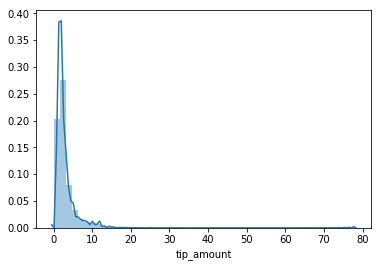

In [19]:
sns.distplot(data.tip_amount)

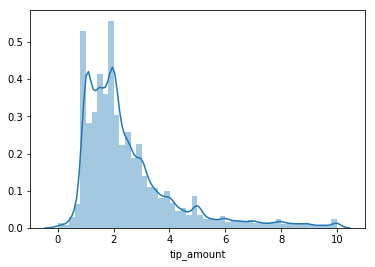

In [20]:
sns.distplot(data.query('tip_amount <=10').tip_amount)

In [23]:
data.pickup_dt = pd.to_datetime(data.pickup_dt)

In [24]:
data.dropoff_dt = pd.to_datetime(data.dropoff_dt)

In [25]:
data_putimeindex = data.set_index('pickup_dt')

In [26]:
data_putimeindex.head()

,dropoff_dt,fare_amount,tip_amount,tolls_amount,trip_time,RatecodeID_1,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,...,DO_Williamsbridge/Olinville,DO_Williamsburg (North Side),DO_Williamsburg (South Side),DO_Windsor Terrace,DO_Woodhaven,DO_Woodlawn/Wakefield,DO_Woodside,DO_World Trade Center,DO_Yorkville East,DO_Yorkville West
pickup_dt,,,,,,,,,,,,,,,,,,,,,
2018-10-05 20:17:42,2018-10-05 20:37:16,15.5,3.36,0.0,19.566667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-10-26 19:53:15,2018-10-26 20:08:53,11.5,2.65,0.0,15.633333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-10-15 06:55:07,2018-10-15 07:06:41,10.0,2.15,0.0,11.566667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-10-13 01:20:52,2018-10-13 01:28:04,8.0,1.86,0.0,7.200000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-10-27 21:45:41,2018-10-27 21:59:43,10.5,2.95,0.0,14.033333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data_putimeindex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33341 entries, 2018-10-05 20:17:42 to 2018-10-20 08:48:40
Columns: 357 entries, dropoff_dt to DO_Yorkville West
dtypes: datetime64[ns](1), float64(4), int64(5), object(2), uint8(345)
memory usage: 14.3+ MB


In [27]:
data_dotimeindex = data.set_index('dropoff_dt')

In [30]:
data_putimeindex.resample('H').mean()

,fare_amount,tip_amount,tolls_amount,trip_time,RatecodeID_1,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,PU_Astoria,...,DO_Williamsbridge/Olinville,DO_Williamsburg (North Side),DO_Williamsburg (South Side),DO_Windsor Terrace,DO_Woodhaven,DO_Woodlawn/Wakefield,DO_Woodside,DO_World Trade Center,DO_Yorkville East,DO_Yorkville West
pickup_dt,,,,,,,,,,,,,,,,,,,,,
2018-10-01 00:00:00,12.863636,2.198182,0.000000,12.786364,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2018-10-01 01:00:00,11.153846,2.141538,0.000000,9.446154,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.076923
2018-10-01 02:00:00,14.583333,3.176667,0.000000,13.163889,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.166667,0.000000,0.00,0.000000,0.166667,0.000000,0.000000,0.000000
2018-10-01 03:00:00,4.000000,1.000000,0.000000,2.633333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2018-10-01 04:00:00,17.714286,5.971429,0.822857,11.392857,0.857143,0.142857,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2018-10-01 05:00:00,30.050000,6.071000,3.456000,20.420000,0.700000,0.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2018-10-01 06:00:00,13.770833,3.152083,0.480000,12.918750,0.916667,0.083333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.041667,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2018-10-01 07:00:00,11.294118,2.453137,0.451765,38.950980,0.941176,0.058824,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.039216
2018-10-01 08:00:00,13.657895,2.830702,0.404211,17.221053,0.982456,0.017544,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.017544,0.017544


(0, 20)

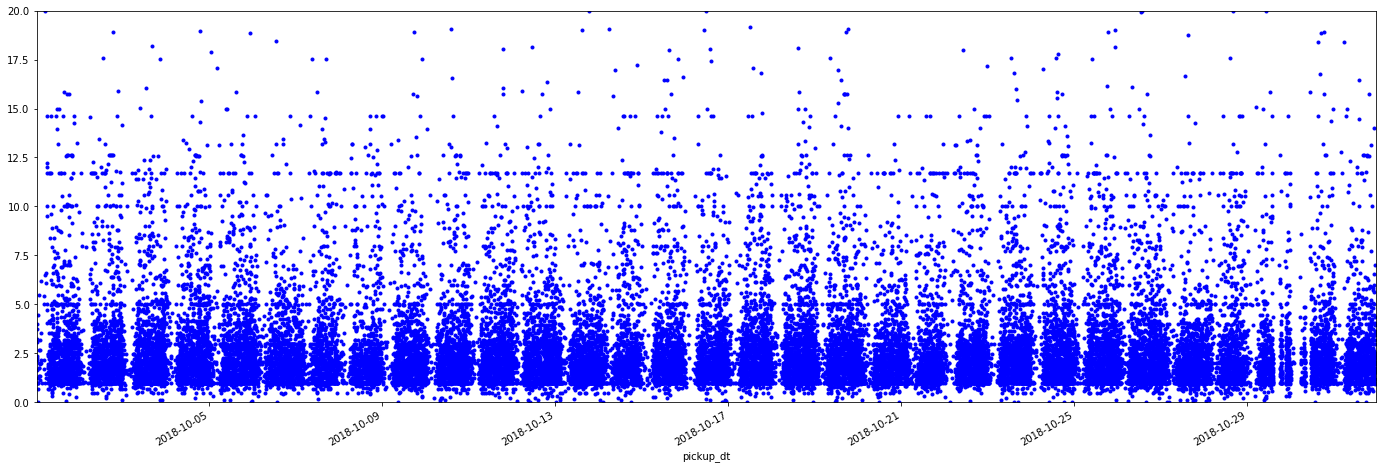

In [34]:
data_putimeindex.tip_amount.plot(figsize=(24,8), style='.b')
plt.ylim(0,20)

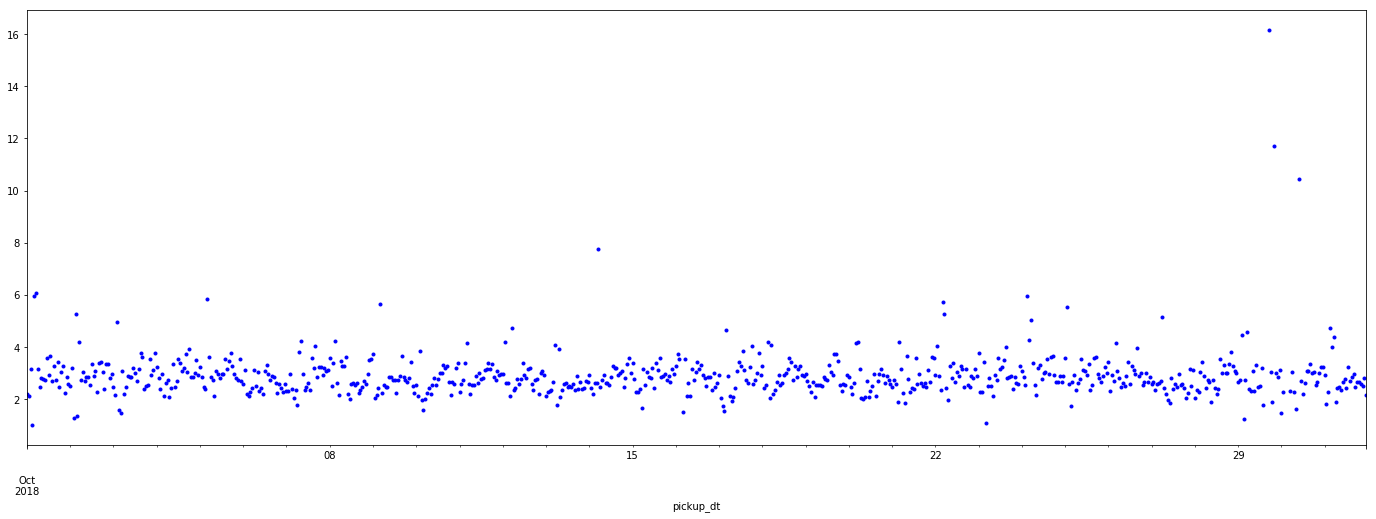

In [36]:
data_putime_hour = data_putimeindex.resample('H').mean()
data_putime_hour.tip_amount.plot(figsize=(24,8), style='.b')